# Traditional Credit Model


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import Aid_traditional as aid
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from credit_model_binary import calculate_traditional_credit_score_binary

In [2]:
data = aid.clean_data_trad('data_traditional.csv')
df = pd.read_csv('credit_score.csv')

df['credit_utilization_ratio']
avg_utilization_ratio = df.groupby('customer_id')['credit_utilization_ratio'].mean().round().astype(int).reset_index()['credit_utilization_ratio']/100
data['avg_utilization_ratio'] = avg_utilization_ratio
avg_inhand_income = df.groupby('customer_id')['monthly_inhand_salary'].mean().round().astype(int).reset_index()['monthly_inhand_salary']
data['avg_inhand_income'] = avg_inhand_income
data['avg_credit_score'] = data['avg_credit_score'].replace(2, 1)


In [3]:
resultado = calculate_traditional_credit_score_binary(data)
resultado


,customer_id,avg_credit_history,avg_delay,avg_num_inquires,avg_outstanding_debt,avg_credit_mix,avg_credit_score,avg_utilization_ratio,avg_inhand_income,history_score,delay_score,inquiries_score,debt_score,mix_score,total_score,fico_score,credit_category
0,CUS_0x1000,46,62,11,1563,0,0,0.33,2706,60,10,10,50,30,27.50,451.250,0
1,CUS_0x1009,128,7,3,203,1,1,0.30,4250,100,70,70,90,65,76.50,720.750,1
2,CUS_0x100b,67,14,2,1030,2,0,0.35,9550,80,70,90,75,100,81.25,746.875,1
3,CUS_0x1011,66,27,7,473,1,1,0.28,5209,80,40,40,90,65,58.50,621.750,1
4,CUS_0x1013,75,12,3,1234,2,1,0.32,7962,80,70,70,75,100,78.25,730.375,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12082,CUS_0xff3,72,12,4,1229,2,1,0.33,1176,80,70,70,75,100,78.25,730.375,1
12083,CUS_0xff4,78,16,5,758,1,1,0.33,2416,80,40,70,75,65,60.75,634.125,1
12084,CUS_0xff6,104,0,2,338,2,1,0.33,9727,100,100,90,90,100,97.00,833.500,1
12085,CUS_0xffc,56,45,12,1300,0,0,0.35,5218,80,10,10,75,30,34.25,488.375,0


<Axes: >

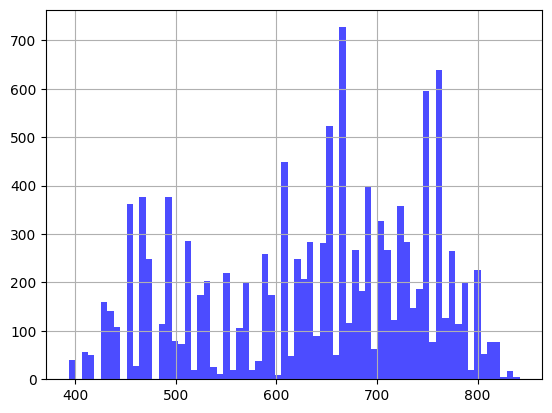

In [4]:
resultado['fico_score'].hist(bins=70, color='blue', alpha=0.7)

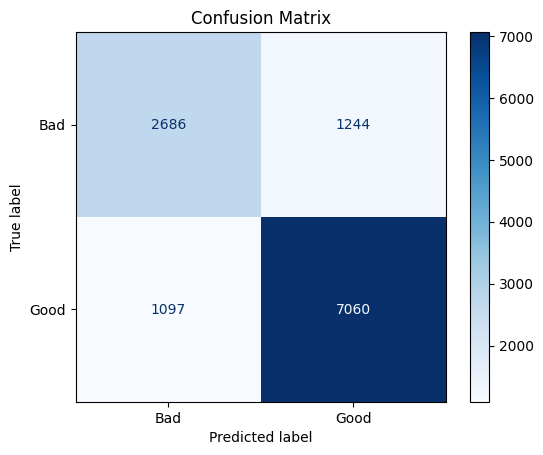

Accuracy: 0.8063

Macro-averaged metrics:
Precision: 0.7801
Recall: 0.7745
F1-score: 0.7771

Per-class metrics:

Bad Credit Score:
  Precision: 0.7100
  Recall: 0.6835
  F1-score: 0.6965

Good Credit Score:
  Precision: 0.8502
  Recall: 0.8655
  F1-score: 0.8578

Detailed Classification Report:
              precision    recall  f1-score   support

         Bad       0.71      0.68      0.70      3930
        Good       0.85      0.87      0.86      8157

    accuracy                           0.81     12087
   macro avg       0.78      0.77      0.78     12087
weighted avg       0.80      0.81      0.81     12087



C:\Users\FrAl098\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\FrAl098\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\FrAl098\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification

In [5]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

y_true = resultado['avg_credit_score']
y_pred = resultado['credit_category']

cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Bad', 'Good'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Calculate basic metrics
accuracy = accuracy_score(y_true, y_pred)
precision_macro = precision_score(y_true, y_pred, average='macro')
recall_macro = recall_score(y_true, y_pred, average='macro')
f1_macro = f1_score(y_true, y_pred, average='macro')

# Calculate metrics for each class
precision_per_class = precision_score(y_true, y_pred, average=None, labels=[0, 1, 2])
recall_per_class = recall_score(y_true, y_pred, average=None, labels=[0, 1, 2])
f1_per_class = f1_score(y_true, y_pred, average=None, labels=[0, 1, 2])

# Print results
print(f"Accuracy: {accuracy:.4f}")
print("\nMacro-averaged metrics:")
print(f"Precision: {precision_macro:.4f}")
print(f"Recall: {recall_macro:.4f}")
print(f"F1-score: {f1_macro:.4f}")

print("\nPer-class metrics:")
class_names = ['Bad', 'Good']
for i, class_name in enumerate(class_names):
    print(f"\n{class_name} Credit Score:")
    print(f"  Precision: {precision_per_class[i]:.4f}")
    print(f"  Recall: {recall_per_class[i]:.4f}")
    print(f"  F1-score: {f1_per_class[i]:.4f}")

# Detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

In [6]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

In [7]:
'''	
# Use all features except the target columns
X = df_results.drop(columns=['Customer ID', 'Calculated FICO Score', 'Original Credit Score'])
y = df_results['Original Credit Score']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

# Train classifiers (they will output probabilities for each class)
clf1 = LogisticRegression(max_iter=5000)
clf1.fit(X_train, y_train)
y_pred_prob1 = clf1.predict_proba(X_test)

clf2 = RandomForestClassifier()
clf2.fit(X_train, y_train)
y_pred_prob2 = clf2.predict_proba(X_test)

# Binarize the true labels for the ROC computation
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)

plt.figure(figsize=(10, 8))
# Plot ROC for each class for both classifiers
for i, class_label in enumerate(classes):
    fpr1, tpr1, _ = roc_curve(y_test_bin[:, i], y_pred_prob1[:, i])
    auc1 = roc_auc_score(y_test_bin[:, i], y_pred_prob1[:, i])
    plt.plot(fpr1, tpr1, label=f'Logistic Regression Class {class_label} (AUC = {auc1:.2f})')
    
    fpr2, tpr2, _ = roc_curve(y_test_bin[:, i], y_pred_prob2[:, i])
    auc2 = roc_auc_score(y_test_bin[:, i], y_pred_prob2[:, i])
    plt.plot(fpr2, tpr2, label=f'Random Forest Class {class_label} (AUC = {auc2:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve Comparison')
plt.legend()
plt.show()
'''

"\t\n# Use all features except the target columns\nX = df_results.drop(columns=['Customer ID', 'Calculated FICO Score', 'Original Credit Score'])\ny = df_results['Original Credit Score']\n\n# Split the dataset\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)\n\n# Train classifiers (they will output probabilities for each class)\nclf1 = LogisticRegression(max_iter=5000)\nclf1.fit(X_train, y_train)\ny_pred_prob1 = clf1.predict_proba(X_test)\n\nclf2 = RandomForestClassifier()\nclf2.fit(X_train, y_train)\ny_pred_prob2 = clf2.predict_proba(X_test)\n\n# Binarize the true labels for the ROC computation\nclasses = np.unique(y)\ny_test_bin = label_binarize(y_test, classes=classes)\n\nplt.figure(figsize=(10, 8))\n# Plot ROC for each class for both classifiers\nfor i, class_label in enumerate(classes):\n    fpr1, tpr1, _ = roc_curve(y_test_bin[:, i], y_pred_prob1[:, i])\n    auc1 = roc_auc_score(y_test_bin[:, i], y_pred_prob1[:, i])\n    plt.plot(fpr1, tpr1, label=f'Logis

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
   
# Split into features (X) and target (y)
X = df_results.drop(columns=['Customer ID', 'Original Credit Score', 'Calculated FICO Score']).iloc[:, :-1].values
y = df_results['Calculated FICO Score'].values   # Last column (FICO Score) as target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

NameError: name 'df_results' is not defined

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam


class NeuralNetworkModel():
    def __init__(self, input_dim, learning_rate=int, epochs=int, batch_size=int) -> int:
        self.input_dim = input_dim
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = self._build_model()

    def _build_model(self):
        model = Sequential([
            Input(shape=(self.input_dim,)),
            Dense(32, activation='relu'),
            Dense(16, activation='linear'),
            Dense(1, activation='linear')
        ])
        model.compile(optimizer=Adam(learning_rate=self.learning_rate), loss='mse')
        return model
    
    def fit(self, X_train, y_train):
        """Fit the model to training data."""
        pass

    def predict(self, X):
        """Predict using the trained model."""
        pass

    def evaluate(self, X_test, y_test):
        """Evaluate the model using MSE and R2."""
        preds = self.predict(X_test)
        mse = mean_squared_error(y_test, preds)
        r2 = r2_score(y_test, preds)
        print(f"Evaluation -- MSE: {mse:.4f}, R2: {r2:.4f}")
        return mse, r2
    
    def fit(self, X_train, y_train):
        self.model.fit(X_train, y_train, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        print("Neural Network model trained.")

    def predict(self, X):
        return self.model.predict(X).flatten()

ModuleNotFoundError: No module named 'tensorflow'

Training Neural Network Model...
Neural Network model trained.

Validation set performance:
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Evaluation -- MSE: 0.1595, R2: 1.0000
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


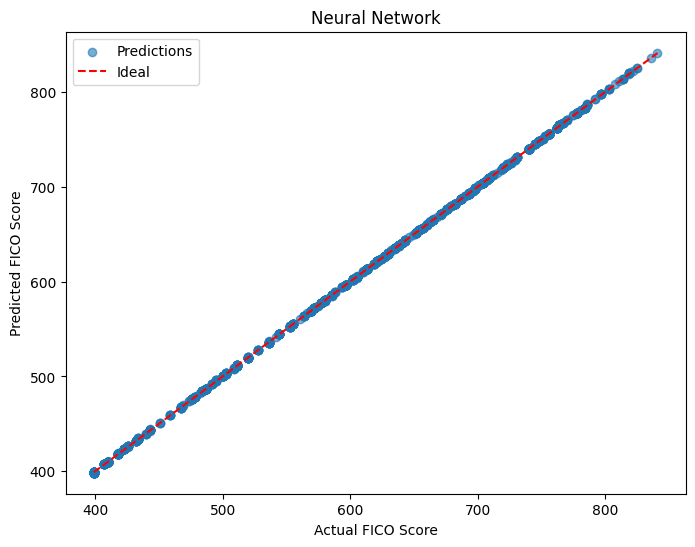


Final Test set performance:
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Evaluation -- MSE: 0.1510, R2: 1.0000


(0.1510419249534607, 0.999988853931427)

In [ ]:
print("Training Neural Network Model...")
nn_model = NeuralNetworkModel(input_dim=X_train.shape[1], learning_rate=0.001, epochs=100, batch_size=16)
nn_model.fit(X_train, y_train)
print("\nValidation set performance:")
nn_model.evaluate(X_val, y_val)

preds_test = nn_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, preds_test, alpha=0.6, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.xlabel("Actual FICO Score")
plt.ylabel("Predicted FICO Score")
plt.title("Neural Network")
plt.legend()
plt.show()

print("\nFinal Test set performance:")
nn_model.evaluate(X_test, y_test)